In [121]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('/config/workspace/dataset/train_u6lujuX_CVtuZ9i (1).csv')

In [123]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [125]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
df.shape

(614, 13)

In [127]:
df=df.dropna()

In [128]:
df.shape

(480, 13)

In [129]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [130]:
df['Dependents']=df['Dependents'].str.replace('3+','3')

In [131]:
df['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [132]:
df['Dependents']=df['Dependents'].astype('int')

In [133]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

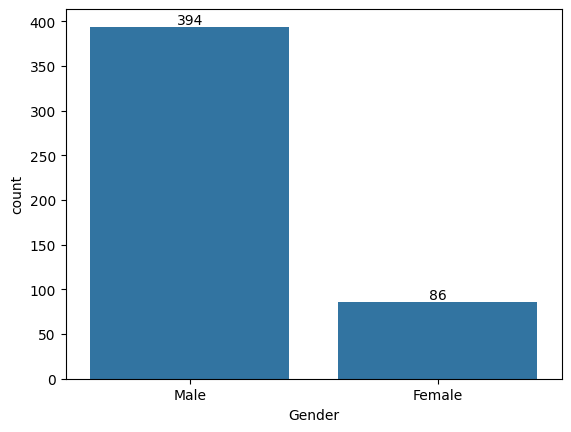

In [134]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [135]:
# Male numbers are more to apply for the loan

In [136]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [137]:
df.groupby(['Gender'],as_index=False)['Loan_Status'].value_counts()

,Gender,Loan_Status,count
0,Female,Y,54
1,Female,N,32
2,Male,Y,278
3,Male,N,116


In [138]:
df.groupby(['Gender'],as_index=False)['Loan_Status'].value_counts()

,Gender,Loan_Status,count
0,Female,Y,54
1,Female,N,32
2,Male,Y,278
3,Male,N,116


In [139]:
# Gender is affecting for loan approval

In [140]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [141]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

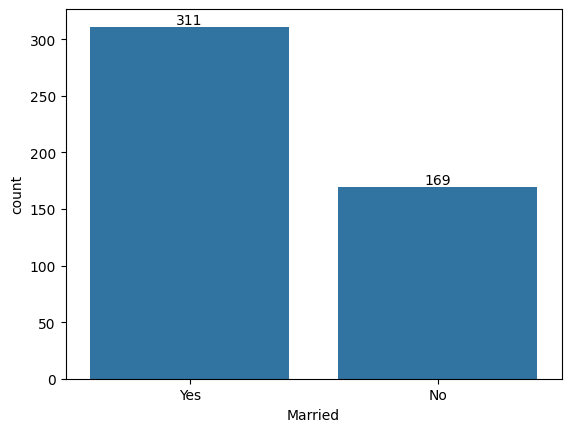

In [142]:
ax = sns.countplot(x = 'Married',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [143]:
df.groupby(['Married'],as_index=False)['Loan_Status'].value_counts().sort_values(by='Loan_Status',ascending=False)

,Married,Loan_Status,count
0,No,Y,105
2,Yes,Y,227
1,No,N,64
3,Yes,N,84


In [144]:
# Marriend people of enough chances of getting loan 

In [145]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [146]:
df.groupby(['Education'],as_index=False)['Loan_Status'].value_counts().sort_values(by='Education',ascending=False)

,Education,Loan_Status,count
2,Not Graduate,Y,61
3,Not Graduate,N,36
0,Graduate,Y,271
1,Graduate,N,112


In [147]:
df.drop('Loan_ID',axis=1,inplace=True)

In [148]:
# now we convert the categorical data into the numerical one

In [149]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [150]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("-"*20)

Gender
['Male' 'Female']
--------------------
Married
['Yes' 'No']
--------------------
Dependents
[1 0 2 3]
--------------------
Education
['Graduate' 'Not Graduate']
--------------------
Self_Employed
['No' 'Yes']
--------------------
ApplicantIncome
[ 4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  3073  1853
  1299  4950  3510  4887  7660  5955  2600  9560  2799  4226  1442  3167
  4692  3500 12500  3667  4166  3748  3600  1800  3941  5649  5821  2645
  4000  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  2500
  3029  2609  5726 10750  7100  4300  3208  1875  5266  3750  1000  3846
  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  2484  1977
  4188  1759  4288  4843  3052 11417  3800  2071  5316 14583  5568 10408
  2137  2957 10513  2014  2718  3459  4895  3316 14999  4200  5042  6950
  2698 11757  2330 14866  1538 10000  4860  6277  2577  9166  2281  3254
 39999  9538  1863  7933  3089  4167  9323  2439  2237  8000  3522  5708
  4344  3497  204

In [151]:
df['Gender']=df['Gender'].map({'Male':0,"Female":1})
df['Married']=df['Married'].map({'No':0,"Yes":1})
df['Education']=df['Education'].map({'Not Graduate':0,'Graduate':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})

In [152]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [153]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [154]:
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [156]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [157]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [159]:
## Scaling

from sklearn.preprocessing import StandardScaler

import pickle 
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #Saving the model
    file=open('/config/workspace/model/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [160]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters={
    'penalty':['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-3,3,7),
    'solver':['lbfgs','liblinear','newton'] 

}
grid= GridSearchCV(LogisticRegression(), param_grid=parameters, cv = 5, scoring='accuracy')

In [162]:
grid.fit(X_train_scaled, y_train)

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton']},
             scoring='accuracy')

In [163]:
grid.best_params_

{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [164]:
log_clf=LogisticRegression(C=10.0,penalty='l2',solver='lbfgs')

In [165]:
log_clf.fit(X_train_scaled,y_train)

LogisticRegression(C=10.0)

In [166]:
y_log_pred=log_clf.predict(X_test_scaled)

In [167]:
y_log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [168]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test, y_log_pred))
print(confusion_matrix(y_test, y_log_pred))
print(classification_report(y_test, y_log_pred))


0.7708333333333334
[[14 21]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.74      0.98      0.85        61

    accuracy                           0.77        96
   macro avg       0.84      0.69      0.70        96
weighted avg       0.81      0.77      0.74        96



In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
parameters={
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']

}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=5,verbose=3,scoring='accuracy')

In [170]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/config/.local/lib/python3.8/site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [171]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [172]:
decision_tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features='log2',splitter='random')

In [173]:
decision_tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       splitter='random')

In [174]:
y_decision_pred=decision_tree_clf.predict(X_test)

In [175]:
y_decision_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1])

In [176]:
print(accuracy_score(y_decision_pred, y_test))
print(classification_report(y_decision_pred, y_test))
print(confusion_matrix(y_decision_pred, y_test))

0.7395833333333334
              precision    recall  f1-score   support

           0       0.40      0.78      0.53        18
           1       0.93      0.73      0.82        78

    accuracy                           0.74        96
   macro avg       0.67      0.75      0.67        96
weighted avg       0.83      0.74      0.77        96

[[14  4]
 [21 57]]


In [177]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()

In [178]:
gnb.fit(X_train,y_train)

BernoulliNB()

In [179]:
y_Naives_pred = gnb.predict(X_test)
y_Naives_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1])

In [180]:
print(accuracy_score(y_Naives_pred, y_test))
print(classification_report(y_Naives_pred, y_test))
print(confusion_matrix(y_Naives_pred, y_test))

0.7604166666666666
              precision    recall  f1-score   support

           0       0.40      0.88      0.55        16
           1       0.97      0.74      0.84        80

    accuracy                           0.76        96
   macro avg       0.68      0.81      0.69        96
weighted avg       0.87      0.76      0.79        96

[[14  2]
 [21 59]]


In [181]:
import pickle
file = open('/config/workspace/model/model_prediction.pkl','wb')
pickle.dump(decision_tree_clf,file)
file.close()